In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Classification with Python

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

### Load Dataset

In [3]:
df = pd.read_csv("cbb.csv")
df.head().T

,0,1,2,3,4
TEAM,North Carolina,Villanova,Notre Dame,Virginia,Kansas
CONF,ACC,BE,ACC,ACC,B12
G,40,40,36,37,37
W,33,35,24,29,32
ADJOE,123.3,123.1,118.3,119.9,120.9
ADJDE,94.9,90.9,103.3,91,90.4
BARTHAG,0.9531,0.9703,0.8269,0.96,0.9662
EFG_O,52.6,56.1,54,54.8,55.7
EFG_D,48.1,46.7,49.5,48.4,45.1
TOR,15.4,16.3,15.3,15.1,17.8


**Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short**

In [4]:
df["windex"] = np.where(df.WAB > 7, "True", "False")

### Data visualization and pre-processing

In [5]:
df1 = df.loc[df["POSTSEASON"].str.contains('F4|S16|E8', na = False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [6]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

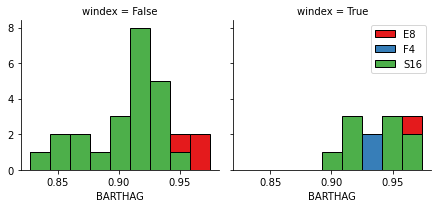

In [7]:
bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

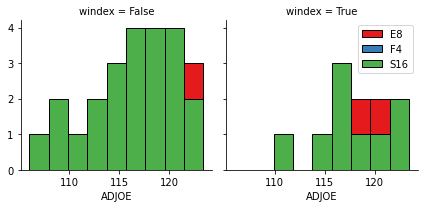

In [8]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Pre-processing: Feature selection/extraction

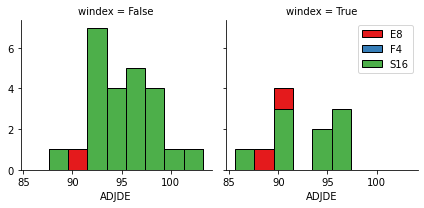

In [9]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

**Convert Categorical features to numerical values**

In [10]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

In [11]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

D:\New folder\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


### Feature Selection

In [12]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


In [13]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

### Normalize Data

In [14]:
X = StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

### Training and Validation

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

# Classification

**K Nearest Neighbor(KNN)**

In [16]:
k_array = []
for n in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train)
    yhat = knn.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    k_array.append(accuracy)

np.array(k_array)

array([0.33333333, 0.33333333, 0.5       , 0.58333333, 0.66666667,
       0.58333333, 0.58333333, 0.66666667, 0.58333333, 0.58333333,
       0.58333333, 0.5       , 0.58333333, 0.58333333])

**Decision Tree**

In [17]:
Tree_array = []
for x in range(1, 10):
    Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = x)
    Tree.fit(x_train, y_train)
    yhat = Tree.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    Tree_array.append(accuracy)
np.array(Tree_array)

array([0.66666667, 0.66666667, 0.5       , 0.33333333, 0.5       ,
       0.41666667, 0.41666667, 0.5       , 0.5       ])

In [18]:
best_depth = Tree_array.index(max(Tree_array))
print("Best Depth index = " + str(best_depth))
print("Best Depth Accuracy = " + str(Tree_array[best_depth])) 

Best Depth index = 0
Best Depth Accuracy = 0.6666666666666666


**Support Vector Machine**

In [19]:
f1score = []
kernel = ["linear", "poly", "rbf", "sigmoid"]
for k in kernel:
    clf = svm.SVC(kernel = k)
    clf.fit(x_train, y_train)
    yhat = clf.predict(x_test)
    accuracy = f1_score(y_test, yhat, average = "weighted")
    f1score.append(accuracy)
svm_accuracy = {"linear": f1score[0],
                "poly": f1score[1],
                "rbf": f1score[2],
                "sigmoid": f1score[3]}
svm_accuracy

{'linear': 0.24216524216524218,
 'poly': 0.5333333333333333,
 'rbf': 0.49122807017543857,
 'sigmoid': 0.5372549019607843}

In [20]:
print("Best SVM = " + str(max(svm_accuracy.items(), key = lambda x: x[1])))

Best SVM = ('sigmoid', 0.5372549019607843)


**Logistic Regression**

In [24]:
logistic_solvers = ["liblinear", "lbfgs", "newton-cg", "sag", "saga"]
average = ["micro", "macro", "weighted"]
Accuracy = []
for y in average:
    for x in logistic_solvers:
        LR = LogisticRegression(C = 0.01, solver = x)
        LR.fit(x_train, y_train)
        yhat = LR.predict(x_test)
        jaccard = jaccard_score(y_test, yhat, average = y)
        Accuracy.append(jaccard)
print(Accuracy)

[0.4117647058823529, 0.4117647058823529, 0.4117647058823529, 0.4117647058823529, 0.4117647058823529, 0.5370370370370371, 0.19444444444444445, 0.19444444444444445, 0.19444444444444445, 0.19444444444444445, 0.49074074074074076, 0.3888888888888889, 0.3888888888888889, 0.3888888888888889, 0.3888888888888889]


# Model Evaluation using Test set

### Import Data

In [26]:
test_df = pd.read_csv("basketball_train.csv")
test_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,UCLA,P12,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,...,32.3,47.4,45.4,36.8,35.6,66.8,0.0,S16,11.0,NaN
1753,Utah,P12,34,25,114.9,88.7,0.9513,55.2,43.0,18.2,...,34.3,52.3,41.4,40.1,31.2,61.4,3.7,S16,5.0,NaN
1754,West Virginia,B12,35,25,110.3,93.3,0.8733,46.1,52.7,18.7,...,55.5,45.5,51.8,31.6,36.5,68.6,4.1,S16,5.0,NaN
1755,Wichita St.,MVC,34,29,114.3,91.5,0.9277,50.3,45.8,15.0,...,36.6,48.9,42.6,35.4,35.3,62.6,4.2,S16,7.0,NaN


In [29]:
test_df["windex"] = np.where(test_df.WAB > 7, "True", "False")
test_df1 = test_df[test_df["POSTSEASON"].str.contains("F4|S18|E8", na = False)]
test_feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_feature["windex"].replace(to_replace = ["False", "True"], value = [0, 1], inplace = True)
test_X = test_feature
test_X = StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

D:\New folder\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([[-1.19216603, -1.48780468,  0.15014821,  2.73536   , -2.54605933,
         0.04579058,  1.09681416, -1.46516663, -1.97518681, -0.02479889,
         1.0920645 , -0.79253705, -0.97121146, -0.0344419 ,  0.30077677,
         0.18950217,  2.02329973, -0.87995848, -1.21226768,  0.65254324,
        -0.87447463],
       [-0.25098232, -0.11020775,  0.51599156, -0.45171875,  0.74756004,
         0.33499423,  0.64885788, -1.63422431, -0.18498728, -0.85804161,
        -1.41133917, -0.97438112,  0.42703072, -0.12561164,  0.22771359,
         1.22640084,  0.98892496, -2.07537378,  0.6104737 , -0.90113114,
         1.14354375],
       [-0.25098232,  0.7163504 ,  0.74464365, -0.60718601,  0.90098183,
         0.66034833, -0.69501096,  0.64805447, -0.31925225, -0.17359223,
        -0.43174643,  0.50310192,  1.16394214, -0.09522172, -0.83170256,
         1.5839521 , -0.0454498 ,  0.64751662,  1.47844579, -0.90113114,
         1.14354375],
       [-0.25098232,  0.16531163,  0.17301342,  0.89566414

In [31]:
test_y = test_df1["POSTSEASON"].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

### Train Test Split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(test_X, test_y, test_size = 0.2, random_state = 4)

### KNN

In [50]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
yhat = knn.predict(x_test)
yhat[0:5]

array(['E8', 'E8', 'E8', 'E8', 'E8'], dtype=object)

**Accuracy**

In [51]:
accuracy = accuracy_score(y_test, yhat)
print("Accuracy Score of KNN = " + str(accuracy))

Accuracy Score of KNN = 0.6666666666666666


**Jaccard**

In [52]:
jaccard = jaccard_score(y_test, yhat, average = "micro")
print("Jaccard Score of KNN = " + str(jaccard))

Jaccard Score of KNN = 0.5


**f1_score**

In [55]:
f1 = f1_score(y_test, yhat, average = "micro")
print("f1 score of KNN = " + str(f1))

f1 score of KNN = 0.6666666666666666


### Decision Tree

In [58]:
Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 1)
Tree.fit(x_train, y_train)
yhat = Tree.predict(x_test)
yhat[0:5]

array(['E8', 'F4', 'E8', 'E8', 'E8'], dtype=object)

**Accuracy**

In [59]:
accuracy = accuracy_score(y_test, yhat)
print("Accuracy score of Decision Tree = " + str(accuracy))

Accuracy score of Decision Tree = 0.5


**Jaccard**

In [60]:
jaccard = jaccard_score(y_test, yhat, average = "micro")
print("Jaccard score of Decision Tree = " + str(jaccard))

Jaccard score of Decision Tree = 0.3333333333333333


**f1_score**

In [61]:
f1 = f1_score(y_test, yhat, average = "micro")
print("f1 score of Decision Tree = " + str(f1))

f1 score of Decision Tree = 0.5


### SVM

In [62]:
clf = svm.SVC(kernel = "rbf")
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)
yhat[0:5]

array(['E8', 'E8', 'E8', 'E8', 'E8'], dtype=object)

**Accuracy**

In [63]:
accuracy = accuracy_score(y_test, yhat)
print("Accuracy score of SVM = " + str(accuracy))

Accuracy score of SVM = 0.6666666666666666


**Jaccard**

In [65]:
jaccard = jaccard_score(y_test, yhat, average = "micro")
print("Jaccard score of SVM = " + str(jaccard))

Jaccard score of SVM = 0.5


**f1_score**

In [66]:
f1 = f1_score(y_test, yhat, average = "micro")
print("f1 score of SVM = " + str(f1))

f1 score of SVM = 0.6666666666666666


### Logistic Regression

In [67]:
LR = LogisticRegression(C = 0.01, solver = "liblinear")
LR.fit(x_test, y_test)
yhat = LR.predict(x_test)
yhat[0:5]

array(['F4', 'E8', 'F4', 'F4', 'E8'], dtype=object)

**Accuracy**

In [69]:
accuracy = accuracy_score(y_test, yhat)
print("Accuracy Score = " + str(accuracy))

Accuracy Score = 0.8333333333333334


**Jaccard Index**

In [71]:
jaccard = jaccard_score(y_test, yhat, average = "micro")
print("Jaccard Score = " + str(jaccard))

Jaccard Score = 0.7142857142857143


**f1_score**

In [72]:
f1 = f1_score(y_test, yhat, average = "micro")
print("f1_score = " + str(f1))

f1_score = 0.8333333333333334


**log loss**

In [74]:
yhat_prob = LR.predict_proba(x_test)
log = log_loss(y_test, yhat_prob)
print("log loss = " + str(log))

log loss = 0.6397720819433546
